## Mobile Money and Financial Inclusion in Tanzania

### 1. Introduction

Only 16.7% of the population in Tanzania has a bank account. But an additional 48.6% of Tanzanians who don’t have a bank account do have other types of formal financial services, primarily mobile money.

For people who have been traditionally excluded from the formal financial system in Africa and other developing markets, mobile money has become an important entry point to financial inclusion. While mobile money is a tool for transferring money among people and businesses/other institutions, it is increasingly becoming a platform for people to access a broad range of financial services, including savings, credit, and insurance.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance).

This model can help mobile money providers target new clients and markets across Tanzania more effectively, and also help financial services providers cross-sell other financial services (savings, credit, and insurance) to the existing mobile money customer base.

In [ ]:
# !pip install python-docx

In [ ]:
!pip install upsetplot

### 2. Read the Data and Brief EDA¶



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import upsetplot
from upsetplot import plot

from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report


In [ ]:
# show all columns
pd.set_option('display.max_columns', None)

data = pd.read_csv('/content/training.csv')

In [ ]:
#preview
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,1,4,1,5,4,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,2,2,-1,4,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,1,1,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [ ]:
#data size
data.shape

(7094, 37)

In [ ]:
#list column names
col_names = data.columns
col_names

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [ ]:
# for nulls
data.columns[data.isnull().any()]

Index([], dtype='object')

In [ ]:
#duplicates
data.duplicated().sum()

0

In [ ]:
data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,0.337327,0.009445,0.004793,0.004793,0.018466,0.156752,0.057795,0.001269,-0.794615,0.876092,-0.692134,1.700733,0.407668,1.622639,0.761066,1.951508,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,0.472831,0.096730,0.069069,0.069069,0.134640,0.363593,0.233372,0.035598,0.895007,2.172787,1.411600,0.457969,2.281322,0.484761,2.420599,1.580819,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,2.000000,-1.000000,2.000000,-1.000000,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,12.000000,2.000000,6.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#check distribution of tartget column
a=data['mobile_money_classification'].value_counts()
a

,count
mobile_money_classification,
3,3126
1,1778
0,1386
2,804


0 no mobile money and no other financial service (saving, borrowing, insurance)

1 no mobile money, but at least one other financial service

2 mobile money only

3 mobile money and at least one other financial service

### 3. Exploratory Data Analysis

The objective of this project is to create a machine learning model to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance)



##### 1. What's the distribution of mobile money users?


The number of customers using mobile money are: 3930 while those not using mobile money are: 3164
              Count  Percentage (%)
mobile_money                       
1              3930            55.4
0              3164            44.6


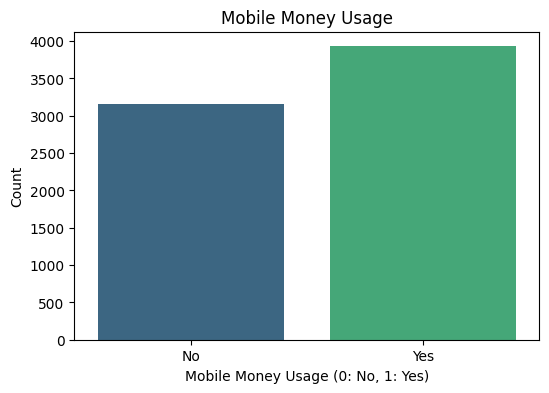

In [ ]:
# Calculate the count and percentage of Mobile Money users
mobile_money_counts = data['mobile_money'].value_counts()
mobile_money_percent = data['mobile_money'].value_counts(normalize=True) * 100

# Combine into a DataFrame for better visualization
mobile_money_distribution = pd.DataFrame({
    'Count': mobile_money_counts,
    'Percentage (%)': mobile_money_percent.round(2)
})

print(F"The number of customers using mobile money are: {mobile_money_counts[1]} while those not using mobile money are: {mobile_money_counts[0]}")
print(mobile_money_distribution)

# Bar Plot for Mobile Money Usage
plt.figure(figsize=(6,4))
sns.countplot(x='mobile_money', data=data, palette='viridis')
plt.title('Mobile Money Usage')
plt.xlabel('Mobile Money Usage (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### 2. Age Distribution?

##### 3. Gender distribution?

##### 4. What's the percentage of users that save?


Savings Usage Distribution:
         Count  Percentage (%)
savings                       
0         3820           53.85
1         3274           46.15


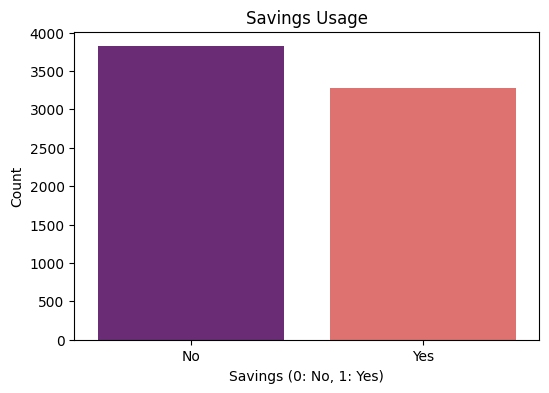

In [ ]:
# Calculate the count and percentage of Savings
savings_counts = data['savings'].value_counts()
savings_percent = data['savings'].value_counts(normalize=True) * 100

# Combine into a DataFrame for better visualization
savings_distribution = pd.DataFrame({
    'Count': savings_counts,
    'Percentage (%)': savings_percent.round(2)
})

print("\nSavings Usage Distribution:")
print(savings_distribution)

# Bar Plot for Savings Usage
plt.figure(figsize=(6,4))
sns.countplot(x='savings', data=data, palette='magma')
plt.title('Savings Usage')
plt.xlabel('Savings (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### 5. What's the distribution of users that borrow?


Borrowing Usage Distribution:
           Count  Percentage (%)
borrowing                       
0           4023           56.71
1           3071           43.29


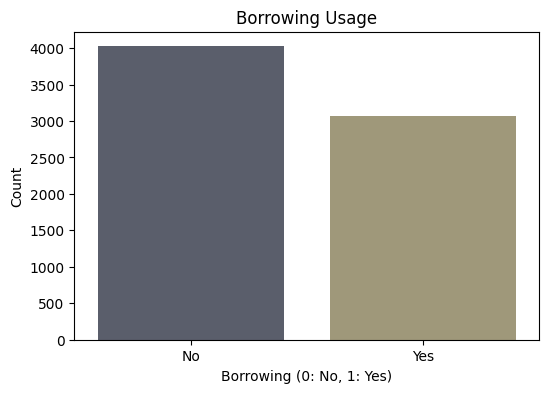

In [ ]:
# Calc the count and percentage of Borrowing users
borrowing_counts = data['borrowing'].value_counts()
borrowing_percent = data['borrowing'].value_counts(normalize=True) * 100

# Combine into a DataFrame for better visualization
borrowing_distribution = pd.DataFrame({
    'Count': borrowing_counts,
    'Percentage (%)': borrowing_percent.round(2)
})

print("\nBorrowing Usage Distribution:")
print(borrowing_distribution)

# Bar Plot for Borrowing Usage
plt.figure(figsize=(6,4))
sns.countplot(x='borrowing', data=data, palette='cividis')
plt.title('Borrowing Usage')
plt.xlabel('Borrowing (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### 6. What's the distribution of users that pay for insurance?


Insurance Usage Distribution:
           Count  Percentage (%)
insurance                       
0           6021           84.87
1           1073           15.13


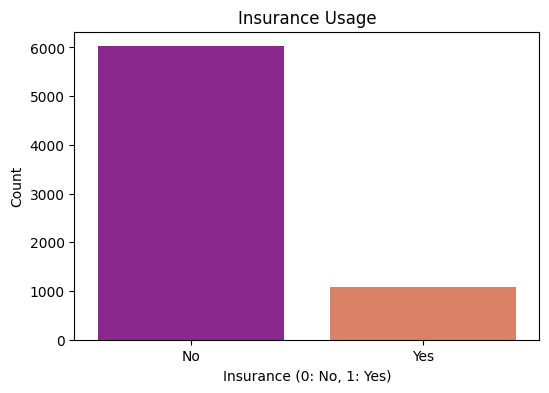

In [ ]:
# Calculate the count and percentage of Insurance users
insurance_counts = data['insurance'].value_counts()
insurance_percent = data['insurance'].value_counts(normalize=True) * 100

# df
insurance_distribution = pd.DataFrame({
    'Count': insurance_counts,
    'Percentage (%)': insurance_percent.round(2)
})

print("\nInsurance Usage Distribution:")
print(insurance_distribution)

# Bar Plot for Insurance Usage
plt.figure(figsize=(6,4))
sns.countplot(x='insurance', data=data, palette='plasma')
plt.title('Insurance Usage')
plt.xlabel('Insurance (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### 7. How are the current mobile money classification groups looking like?


Mobile Money Classification Distribution:
                                            Count  Percentage (%)
Mobile_money_classification_label                                
Mobile Money & At Least One Other FS         3126           44.07
No Mobile Money, But At Least One Other FS   1778           25.06
No Mobile Money & No Other FS                1386           19.54
Mobile Money Only                             804           11.33


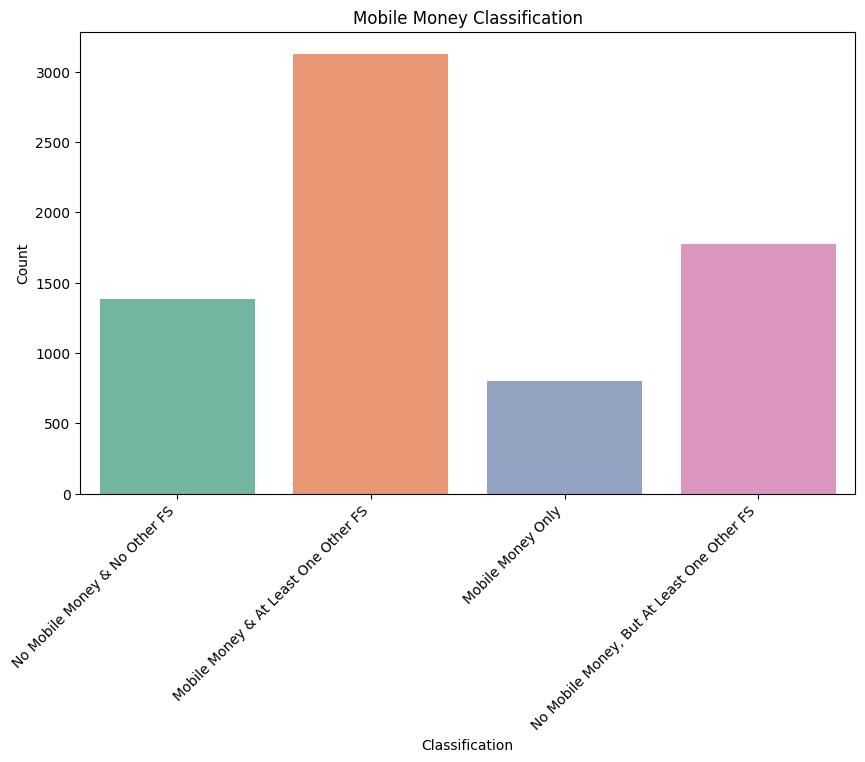

In [ ]:
# Define the classification labels based on the codebook
classification_labels = {
    0: 'No Mobile Money & No Other FS',
    1: 'No Mobile Money, But At Least One Other FS',
    2: 'Mobile Money Only',
    3: 'Mobile Money & At Least One Other FS'}

# Replace numerical codes with labels for clarity
data['Mobile_money_classification_label'] = data['mobile_money_classification'].map(classification_labels)

# Calculate counts and percentages
classification_counts = data['Mobile_money_classification_label'].value_counts()
classification_percent = data['Mobile_money_classification_label'].value_counts(normalize=True) * 100

# Combine into a DataFrame
classification_distribution = pd.DataFrame({
    'Count': classification_counts,
    'Percentage (%)': classification_percent.round(2)
})

print("\nMobile Money Classification Distribution:")
print(classification_distribution)


# Bar Plot for Mobile Money Classification
plt.figure(figsize=(10,6))
sns.countplot(x='Mobile_money_classification_label', data=data, palette='Set2')
plt.title('Mobile Money Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Bivariate Analysis

##### 1. How many users use mobile money and save, borrow or buy insurance?



Crosstab: Mobile Money vs Savings (%):
savings               0          1
mobile_money                      
0             67.446271  32.553729
1             42.900763  57.099237

Crosstab: Mobile Money vs Borrowing (%):
borrowing             0          1
mobile_money                      
0             67.351454  32.648546
1             48.142494  51.857506

Crosstab: Mobile Money vs Insurance (%):
insurance             0          1
mobile_money                      
0             89.190898  10.809102
1             81.399491  18.600509


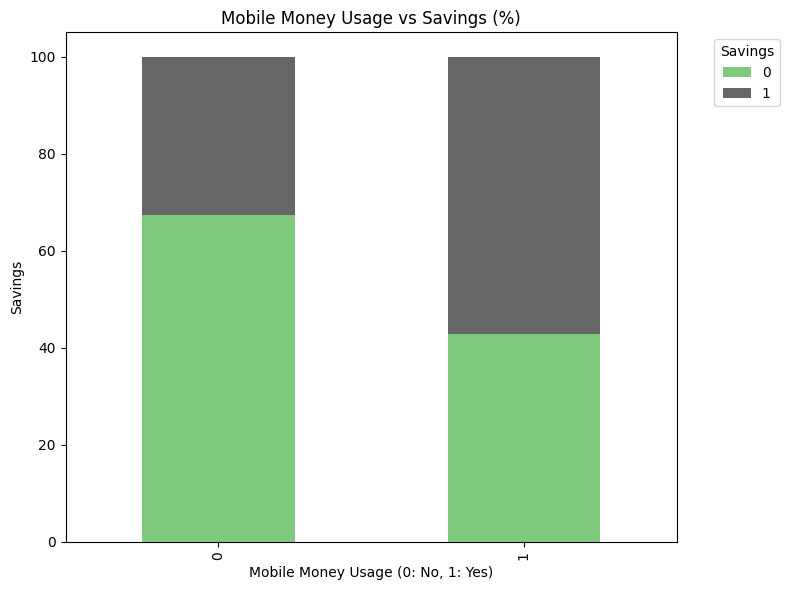

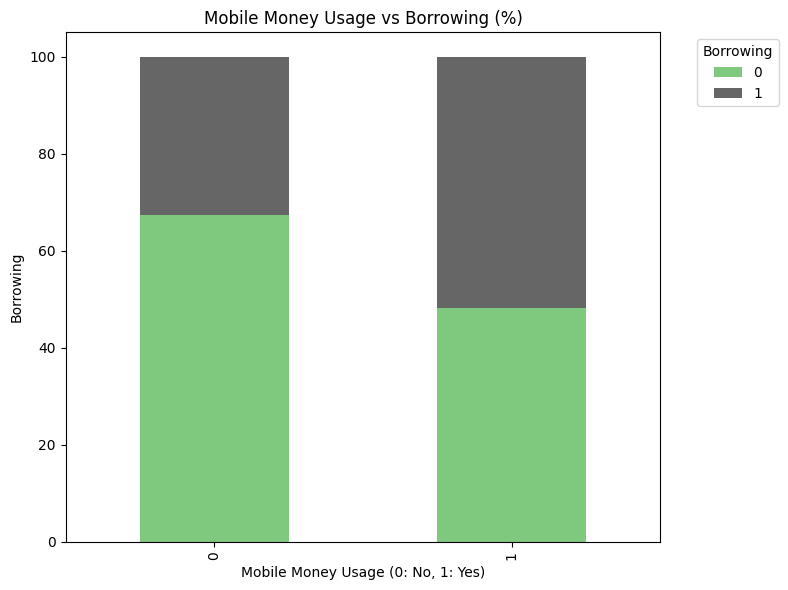

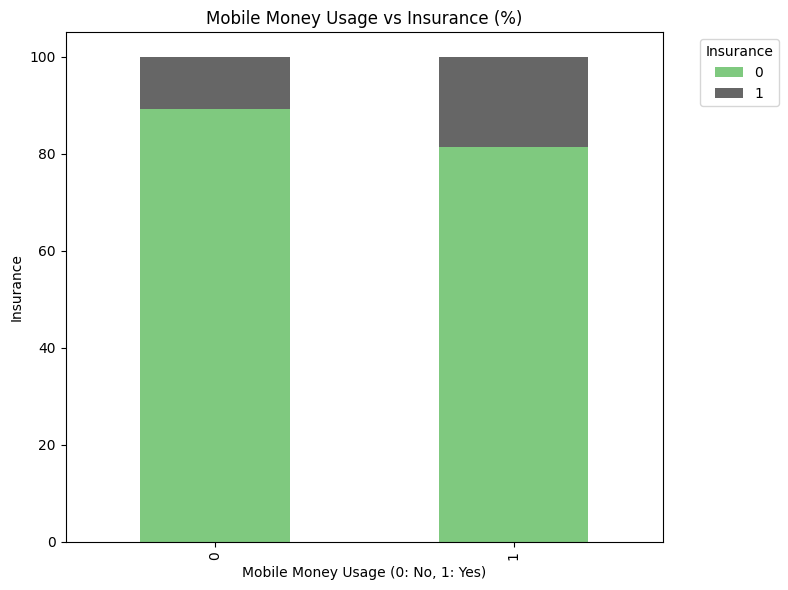

In [ ]:
# Create crosstabs
mobile_savings = pd.crosstab(data['mobile_money'], data['savings'], normalize='index') * 100
mobile_borrowing = pd.crosstab(data['mobile_money'], data['borrowing'], normalize='index') * 100
mobile_insurance = pd.crosstab(data['mobile_money'], data['insurance'], normalize='index') * 100

# Display the crosstabs
print("\nCrosstab: Mobile Money vs Savings (%):")
print(mobile_savings)

print("\nCrosstab: Mobile Money vs Borrowing (%):")
print(mobile_borrowing)

print("\nCrosstab: Mobile Money vs Insurance (%):")
print(mobile_insurance)


# Function to plot crosstabs
def plot_crosstab(crosstab, title, xlabel, ylabel):
    crosstab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Accent')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=ylabel, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot Mobile Money vs Savings
plot_crosstab(
    mobile_savings,
    title='Mobile Money Usage vs Savings (%)',
    xlabel='Mobile Money Usage (0: No, 1: Yes)',
    ylabel='Savings'
)

# Plot Mobile Money vs Borrowing
plot_crosstab(
    mobile_borrowing,
    title='Mobile Money Usage vs Borrowing (%)',
    xlabel='Mobile Money Usage (0: No, 1: Yes)',
    ylabel='Borrowing'
)

# Plot Mobile Money vs Insurance
plot_crosstab(
    mobile_insurance,
    title='Mobile Money Usage vs Insurance (%)',
    xlabel='Mobile Money Usage (0: No, 1: Yes)',
    ylabel='Insurance'
)

##### 2. What's the corelation between mobile users & gender?


##### 3. What's the corelation between mobile users & Age?


##### 4. Correlation between mobile users & English Literacy

Correlation heat heatmap



In [ ]:
data = data.drop(['Mobile_money_classification_label'], axis=1)

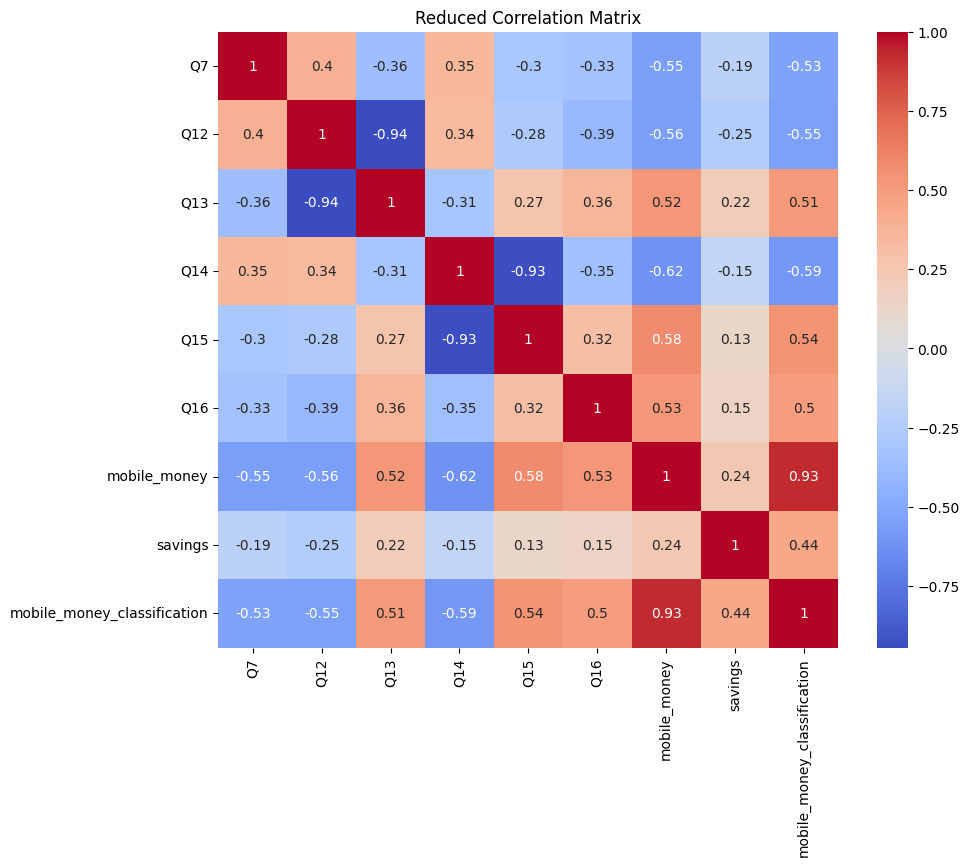

In [ ]:
# Get the correlation of all features with the target variable
corr_matrix = data.corr()

# Focus on features with strong correlation to the target (absolute correlation above 0.4 for example)
strong_corr_features = corr_matrix['mobile_money_classification'][abs(corr_matrix['mobile_money_classification']) > 0.4].index

# Create a correlation matrix only with these features
reduced_corr_matrix = data[strong_corr_features].corr()

# Plot the reduced correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Reduced Correlation Matrix')
plt.show()


The correlation matrix show several features with high correlation to our target variable either high positive correlation or an inverse relationship from the negative ones. The features inlude:

*   Q13 = -0.94
*   Q14 = -0.93
*   Mobile Money = 0.93



### 4. Feature Engineering


##### Class balancing

### 5. Model Development

In [ ]:
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,1,4,1,5,4,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,2,2,-1,4,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,1,1,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [ ]:
data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [ ]:
categorical_columns = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']


In [ ]:
#split data
# X = data.drop(['ID','mobile_money_classification','Mobile_money_classification_label', 'mobile_money',	'savings',	'borrowing',	'insurance'], axis=1)
# X = data.drop(['ID','mobile_money_classification', 'mobile_money',	'savings',	'borrowing',	'insurance'], axis=1)
X = data.drop(['ID','mobile_money_classification','borrowing',	'insurance'], axis=1)
y = data['mobile_money_classification']

# One-Hot Encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardize continuous columns
scaler = StandardScaler()
X_encoded[['Q1', 'Longitude', 'Latitude']] = scaler.fit_transform(X_encoded[['Q1', 'Longitude', 'Latitude']])

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y)

# Split data into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

#### Model 1: Support Vector Machine (SVM)  


In [ ]:
# Fit the linear SVM model
model1 = svm.SVC(kernel='linear', C=1)
model1.fit(X_train, y_train)
# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy model1: {accuracy:.2f}")
print(f"Recall model1: {recall:.2f}")
print(f"Precision model1: {precision:.2f}")
print(f"F1 Score model1: {f1:.2f}")

Accuracy model1: 0.82
Recall model1: 0.82
Precision model1: 0.86
F1 Score model1: 0.81


#### Model 2: Random Forest classifier

In [ ]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Train the model on the training data
clf_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = clf_rf.predict(X_test)
# Calculate accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy model1: {accuracy:.2f}")
print(f"Recall model1: {recall:.2f}")
print(f"Precision model1: {precision:.2f}")
print(f"F1 Score model1: {f1:.2f}")

Accuracy model1: 0.82
Recall model1: 0.82
Precision model1: 0.86
F1 Score model1: 0.81


Feissal

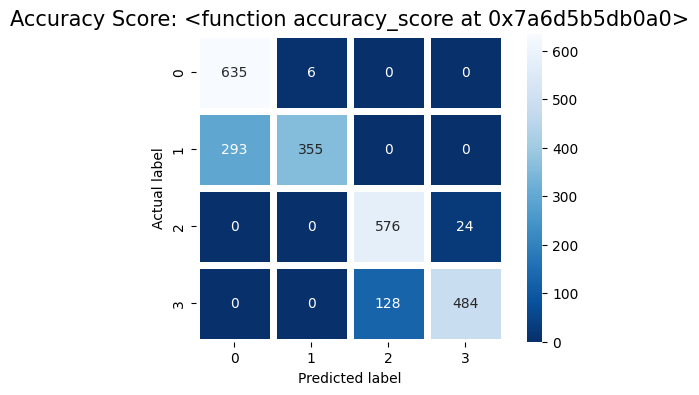

In [ ]:
#Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size=15)
plt.show()

#### Model 3: decision tree classifier

In [ ]:
# Fit the decision tree classifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train, y_train)
# Predict on the test set
y_pred = model2.predict(X_test)

# Calculate accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy model1: {accuracy:.2f}")
print(f"Recall model1: {recall:.2f}")
print(f"Precision model1: {precision:.2f}")
print(f"F1 Score model1: {f1:.2f}")

Accuracy model1: 0.84
Recall model1: 0.84
Precision model1: 0.84
F1 Score model1: 0.84


In [ ]:
# Hyperparameter grids for GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
decision_tree_param_grid = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_forest_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Models
svm_model = svm.SVC()
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# GridSearchCV for each model
svm_grid_search = GridSearchCV(svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
decision_tree_grid_search = GridSearchCV(decision_tree_model, param_grid=decision_tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
random_forest_grid_search = GridSearchCV(random_forest_model, param_grid=random_forest_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models with the training data
svm_grid_search.fit(X_train, y_train)
decision_tree_grid_search.fit(X_train, y_train)
random_forest_grid_search.fit(X_train, y_train)

# Best scores and parameters
print("Best SVM Score:", svm_grid_search.best_score_)
print("Best SVM Params:", svm_grid_search.best_params_)
print("Best Decision Tree Score:", decision_tree_grid_search.best_score_)
print("Best Decision Tree Params:", decision_tree_grid_search.best_params_)
print("Best Random Forest Score:", random_forest_grid_search.best_score_)
print("Best Random Forest Params:", random_forest_grid_search.best_params_)

# Validation accuracy
svm_best_model = svm_grid_search.best_estimator_
decision_tree_best_model = decision_tree_grid_search.best_estimator_
random_forest_best_model = random_forest_grid_search.best_estimator_

# Predictions on validation set
svm_val_pred = svm_best_model.predict(X_test)
decision_tree_val_pred = decision_tree_best_model.predict(X_test)
random_forest_val_pred = random_forest_best_model.predict(X_test)

# Calculate accuracy on validation set
print("SVM Validation Accuracy:", accuracy_score(y_test, svm_val_pred))
print("Decision Tree Validation Accuracy:", accuracy_score(y_test, decision_tree_val_pred))
print("Random Forest Validation Accuracy:", accuracy_score(y_test, random_forest_val_pred))

# Classification reports and confusion matrices
print("SVM Classification Report:")
print(classification_report(y_test, svm_val_pred))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_val_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_val_pred))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, decision_tree_val_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_val_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, random_forest_val_pred))


Best SVM Score: 0.8436459270364818
Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Decision Tree Score: 0.8279519740129935
Best Decision Tree Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Random Forest Score: 0.881235932033983
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
SVM Validation Accuracy: 0.8416633346661335
Decision Tree Validation Accuracy: 0.8184726109556177
Random Forest Validation Accuracy: 0.8864454218312675
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       641
           1       0.95      0.61      0.75       648
           2       0.86      0.94      0.90       600
           3       0.93      0.85      0.89       612

    accuracy                           0.84      2501
   macro avg       0.87      0.84      0.84      2501
weighted avg       0.87      0.84      0.84    

### Optimization